In [1]:
# Modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.constants as constants
import scipy.signal as sig

import pandas as pd
import seaborn as sns

In [2]:
trajectory = pd.read_csv('trajectory.csv')

In [3]:
trajectory

,x,y,vx,vy,ax,ay
0,2.00000,8.00000,-1.014000,0.266400,0.597828,-1.000000
1,1.90159,8.02164,-0.954217,0.166400,0.597828,-1.000000
2,1.81117,8.03328,-0.854217,0.066400,1.000000,-1.000000
3,1.73075,8.03492,-0.754217,-0.033600,1.000000,-1.000000
4,1.66032,8.02656,-0.654217,-0.133600,1.000000,-1.000000
5,1.59990,8.01093,-0.554217,-0.179090,1.000000,-0.454904
6,1.54948,7.98802,-0.454217,-0.279090,1.000000,-1.000000
7,1.50906,7.95511,-0.354217,-0.379090,1.000000,-1.000000
8,1.47864,7.91220,-0.254217,-0.479090,1.000000,-1.000000
9,1.45822,7.85929,-0.154217,-0.579090,1.000000,-1.000000


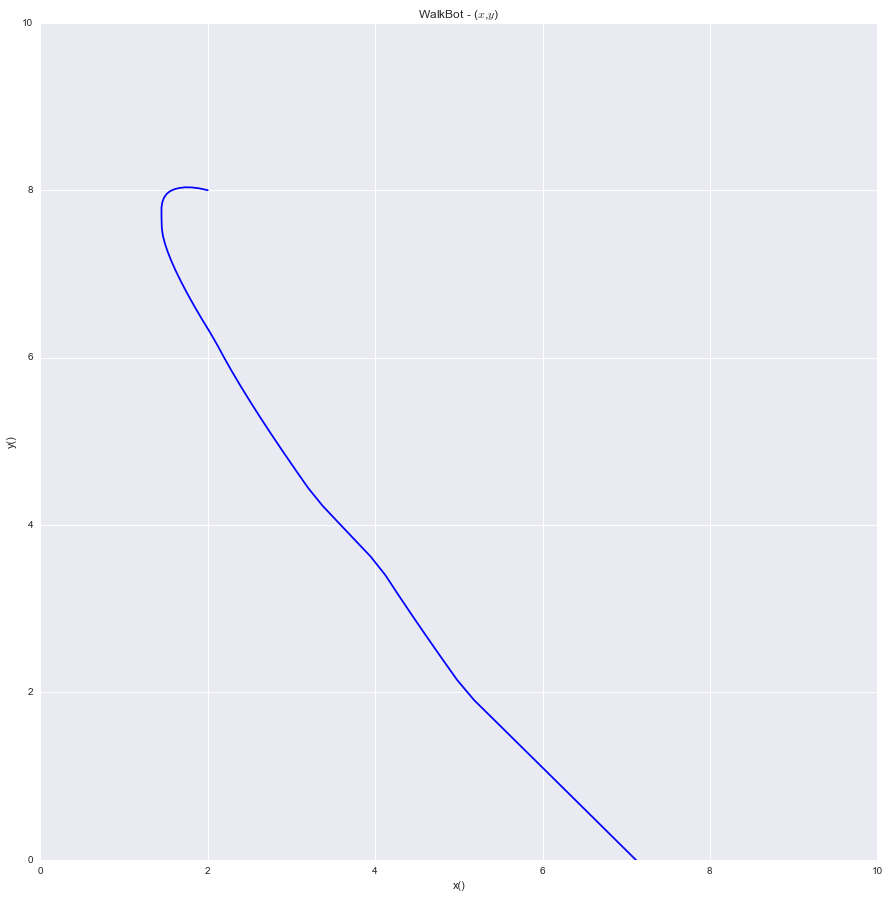

In [4]:
fig = plt.figure(figsize=(15,15))
# Change values of xlim() and ylim() to see
# the actual extent being reached by IW(1)
plt.xlim(0,10) # These are the bounds on x and y
plt.ylim(0,10)
plt.xlabel( 'x()')
plt.ylabel( 'y()')
ax = fig.add_subplot(111)
ax.set_title("WalkBot - ($x$,$y$)")
ax.grid(True)
ax.plot( trajectory['x'], trajectory['y'], color='b', linestyle='-', markersize=10)
plt.savefig('trajectory.pdf',dpi=300,bbox_inches='tight')